In [10]:
from langgraph.graph import StateGraph ,START,END
from langchain_openai import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict
import os

In [11]:
load_dotenv()
api_key = os.getenv("GOOGLE_API_KEY")

In [12]:
model = ChatGoogleGenerativeAI(api_key=api_key,model="gemini-2.5-flash")

In [13]:
class BlogState(TypedDict):
    title:str
    outline:str
    blog:str
    score:int

In [14]:
def create_outline(state:BlogState)-> BlogState:
    title = state['title'] 
    prompt = f"Draft me the detial outline on {title}.Use professional + Precise wording"
    new_outline = model.invoke(prompt).content

    state['outline'] = new_outline

    return state

In [15]:
def create_blog(state:BlogState)-> BlogState:
    outline = state['outline']

    prompt = f'Draft me good and informative + Precise blog on {outline}. Use emojies to make it interative and use friendly , fun and professional way'

    blog = model.invoke(prompt).content

    state['blog'] = blog

    return state

In [16]:
def evaluate(state:BlogState)-> BlogState:
    outline = state['outline']
    blog = state['blog']

    prompt = f'Analyze the outline -> {outline} \n and blog -> {blog} \n.Give total score out of 10 the ouptut should be the single integer'

    score = model.invoke(prompt).content

    state['score'] = score

    return state

In [17]:
# create graph

graph = StateGraph(BlogState)

## ADD NODE

graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)
graph.add_node("evaluate",evaluate)

## Add Edge

graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","create_blog")
graph.add_edge("create_blog","evaluate")
graph.add_edge("evaluate",END)

## create workflow 

workflow = graph.compile()

In [18]:
inital_state = {"title":"How can i full stack software developer with MERN stack can become a AI Engineer using langchain and langgraph and build exiting projects?"}

final_result = workflow.invoke(inital_state)

print(final_result)

{'title': 'How can i full stack software developer with MERN stack can become a AI Engineer using langchain and langgraph and build exiting projects?', 'outline': 'This detailed outline provides a structured pathway for a MERN stack software developer to transition into an AI Engineer role, focusing on LLM orchestration and agentic systems using LangChain and LangGraph, culminating in the development of impactful projects.\n\n---\n\n## Detailed Outline: MERN Stack Developer to AI Engineer with LangChain & LangGraph\n\n### I. Introduction: Strategic Transition for MERN Stack Developers\n\n*   **A. The Evolving Landscape of Software Development:**\n    *   Emergence of Generative AI and Large Language Models (LLMs) as foundational technologies.\n    *   Demand for engineers proficient in building intelligent, agentic systems.\n*   **B. Why MERN Developers are Uniquely Positioned:**\n    *   Strong foundation in web application architecture, API development, data handling, and UI/UX.\n   

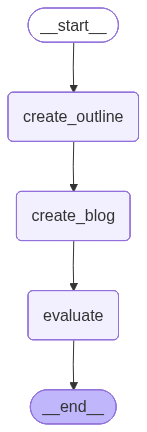

In [19]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())

In [20]:
print("--BLOG Outline--")
print(final_result['outline'])



--BLOG Outline--
This detailed outline provides a structured pathway for a MERN stack software developer to transition into an AI Engineer role, focusing on LLM orchestration and agentic systems using LangChain and LangGraph, culminating in the development of impactful projects.

---

## Detailed Outline: MERN Stack Developer to AI Engineer with LangChain & LangGraph

### I. Introduction: Strategic Transition for MERN Stack Developers

*   **A. The Evolving Landscape of Software Development:**
    *   Emergence of Generative AI and Large Language Models (LLMs) as foundational technologies.
    *   Demand for engineers proficient in building intelligent, agentic systems.
*   **B. Why MERN Developers are Uniquely Positioned:**
    *   Strong foundation in web application architecture, API development, data handling, and UI/UX.
    *   Existing proficiency in JavaScript/TypeScript, Node.js, React, and MongoDB directly transferable to AI application development.
*   **C. Core Focus: LLM Or

In [21]:
print("--BLOG--")
print(final_result['blog'])

--BLOG--
## MERN Stack Dev to AI Engineer: Orchestrate LLMs with LangChain & LangGraph! 🚀

The software development landscape is evolving at warp speed, with Generative AI and Large Language Models (LLMs) taking center stage. If you're a seasoned MERN Stack developer, you're not just watching from the sidelines – you're uniquely positioned to ride this wave and transition into an AI Engineer role, building intelligent, agentic systems. This isn't just a career pivot; it's an upgrade! ✨

This blog post outlines a clear, project-focused pathway for MERN developers to master LLM orchestration and agentic systems using the powerful duo: LangChain and LangGraph. Get ready to build truly impactful, "exciting projects"! 💡

---

### I. Introduction: Your Strategic Leap into AI Engineering 🎯

The demand for engineers who can integrate LLMs into robust applications is soaring. As a MERN developer, you already possess a strong foundation in web application architecture, API development, data hand

In [22]:
print("--SCORE--")
print(final_result['score'])

--SCORE--
10
